In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/presidential-gaffes/presidential gaffes.csv


In [2]:
prez = pd.read_csv("/kaggle/input/presidential-gaffes/presidential gaffes.csv", encoding='latin-1')
prez

,President,Date,Context,Quote or Statement,Category,Impact,Correction or Clarification,Source,Remarks,URL
0,Joe Biden,26-May-23,Biden incorrectly stated he has four granddaug...,"Biden said, ""all the real athletes in my famil...",Verbal slip-up,Critics increasingly attack him over his age a...,None,Forbes,The gaffe comes amidst criticism of Biden's vo...,https://www.forbes.com/sites/brianbushard/2023...
1,Donald Trump,18-Apr-16,Trump confused 9/11 with the convenience store...,"""I wrote this out, and it's very close to my h...",Verbal slip-up,Trump's confusion was highlighted during his 2...,None,Salon,"Trump confused the September 11, 2001, terrori...",https://www.salon.com/2020/06/26/10-of-trumps-...
2,Donald Trump,04-Aug-19,Trump confused Dayton and Toledo after a mass ...,"""May God bless the memory of those who perishe...",Verbal slip-up,Trump's confusion during a speech on a mass sh...,None,Salon,Trump mistakenly mentioned Toledo instead of D...,https://www.salon.com/2020/06/26/10-of-trumps-...
3,Donald Trump,Apr-19,Trump demands investigation of the 'oranges' o...,"""I hope they now go and take a look at the ora...",Verbal slip-up,"Trump's mispronunciation of ""origins"" raised e...",None,Salon,"Trump struggled to use the word ""origins"" and ...",https://www.salon.com/2020/06/26/10-of-trumps-...
4,Donald Trump,Apr-20,Trump claimed there would be 'one million eigh...,"Americans were getting ""one million eight hund...",Verbal slip-up,Trump's exaggerated claim about COVID-19 testi...,None,Salon,Trump inflated the number of COVID-19 tests be...,https://www.salon.com/2020/06/26/10-of-trumps-...
...,...,...,...,...,...,...,...,...,...,...
763,Joe Biden,"Wednesday October 8, 2014",-,"""US Vice President Joe Biden Calls Saudi Arabi...",Diplomatic gaffe,Clarification provided,Biden clarified his remarks on Saudi Arabia fi...,www.ndtv.com,NaN,https://www.ndtv.com/topic/joe-biden-gaffes
764,Joe Biden,"Tuesday October 7, 2014",Middle East,"""White House Defends Joe Biden After Middle Ea...",Diplomatic gaffes,Praise for admitting mistakes,Biden apologized to key allies over his gaffes,www.ndtv.com,NaN,https://www.ndtv.com/topic/joe-biden-gaffes
765,Joe Biden,"Thursday September 18, 2014",Philadelphia,"""Joe Biden Apologises for 'Shylocks' Gaffe, Vi...",Offensive remark,"Apology, visit to Iowa",Biden apologized for the offensive remark,www.ndtv.com,NaN,https://www.ndtv.com/topic/joe-biden-gaffes
766,Joe Biden,"Sunday January 20, 2013",Oath ceremony,"""Joe Biden's gaffe: calls himself 'proud presi...",Verbal slip,"Mockery, criticism",-,www.ndtv.com,NaN,https://www.ndtv.com/topic/joe-biden-gaffes


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

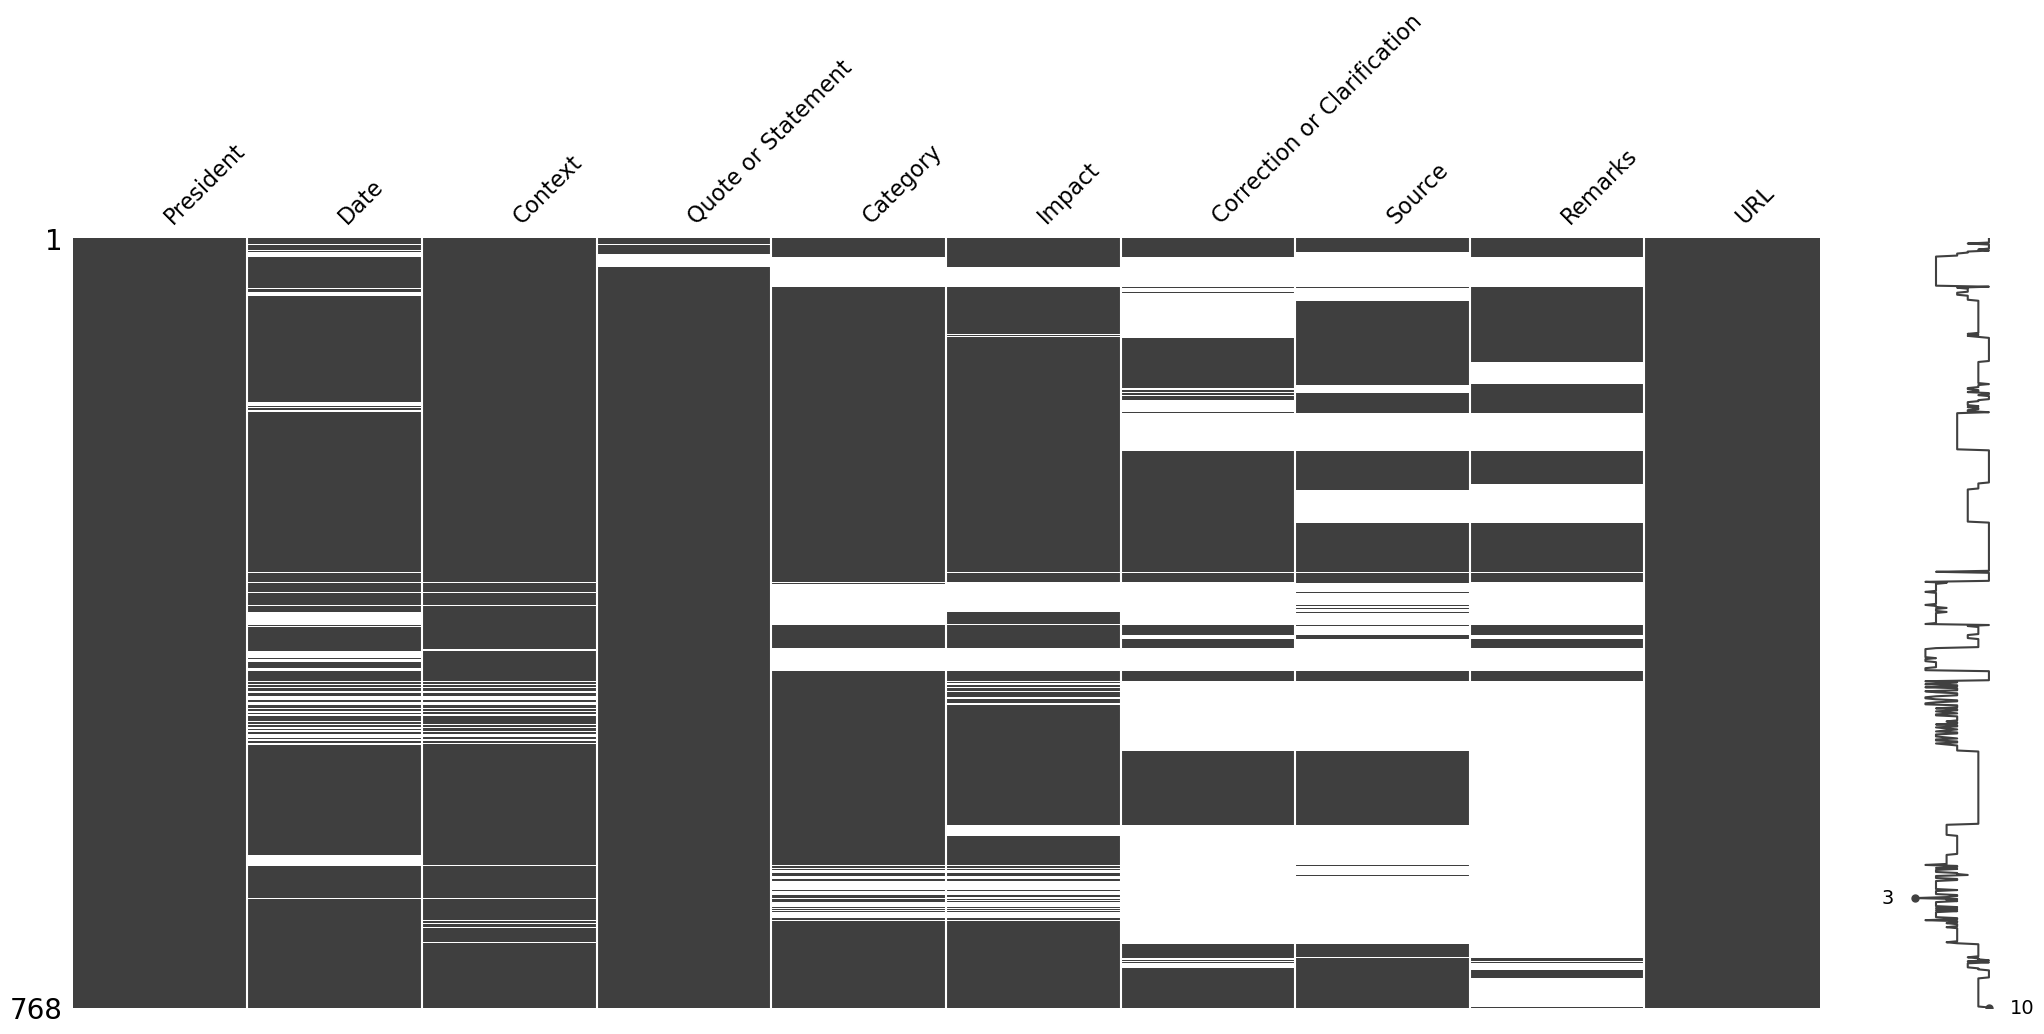

In [3]:
import missingno as msno
msno.matrix(prez)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset into a DataFrame
df = prez

# Display the first few rows of the DataFrame
print(df.head())

# Data Summary
summary = df.describe()
print(summary)



      President       Date                                            Context  \
0     Joe Biden  26-May-23  Biden incorrectly stated he has four granddaug...   
1  Donald Trump  18-Apr-16  Trump confused 9/11 with the convenience store...   
2  Donald Trump  04-Aug-19  Trump confused Dayton and Toledo after a mass ...   
3  Donald Trump     Apr-19  Trump demands investigation of the 'oranges' o...   
4  Donald Trump     Apr-20  Trump claimed there would be 'one million eigh...   

                                  Quote or Statement        Category  \
0  Biden said, "all the real athletes in my famil...  Verbal slip-up   
1  "I wrote this out, and it's very close to my h...  Verbal slip-up   
2  "May God bless the memory of those who perishe...  Verbal slip-up   
3  "I hope they now go and take a look at the ora...  Verbal slip-up   
4  Americans were getting "one million eight hund...  Verbal slip-up   

                                              Impact  \
0  Critics increasingly 

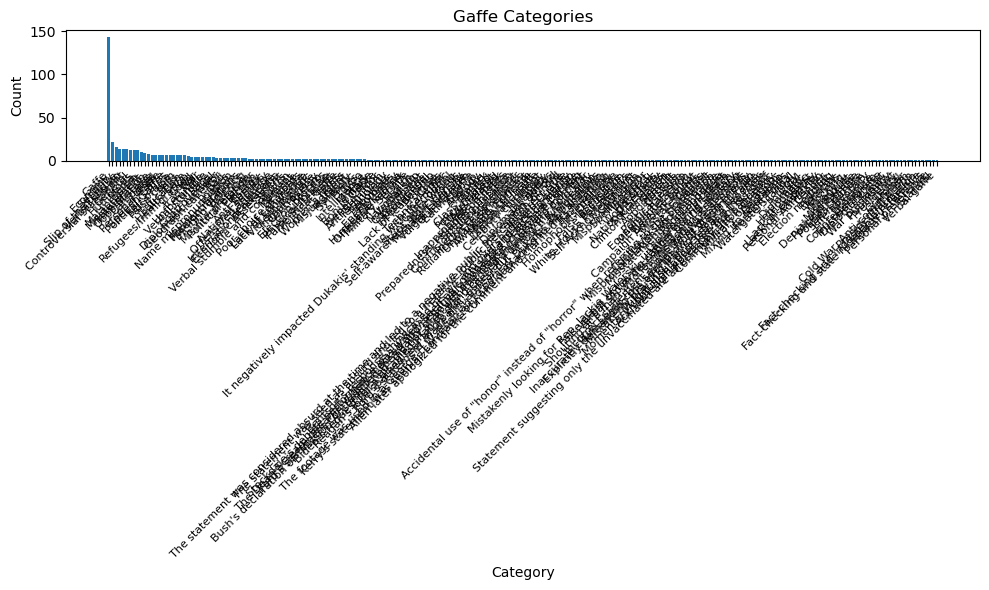

In [5]:
import matplotlib.pyplot as plt

category_counts = df["Category"].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.8  # Adjust the bar width as needed

ax.bar(category_counts.index, category_counts.values, width=bar_width)
ax.set_xlabel("Category")
ax.set_ylabel("Count")
ax.set_title("Gaffe Categories")
ax.set_xticks(range(len(category_counts.index)))  # Set custom x-axis ticks
ax.set_xticklabels(category_counts.index, rotation=45, ha='right', fontsize=8)  # Set x-axis labels with rotation and reduced font size
plt.tight_layout()
plt.show()


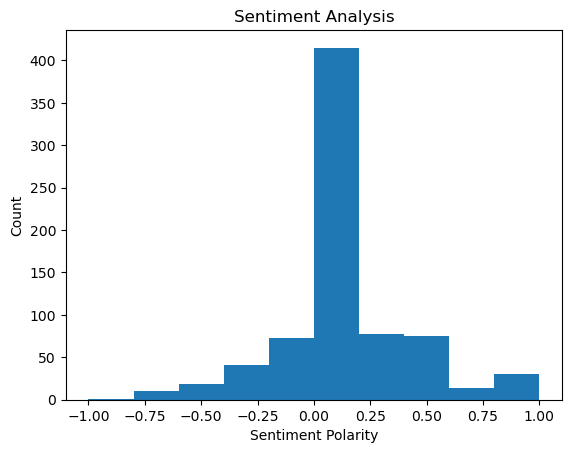

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob


# Drop rows with null values in the "Quote or Statement" column
df.dropna(subset=["Quote or Statement"], inplace=True)

# Apply sentiment analysis to the "Quote or Statement" column
df["Sentiment"] = df["Quote or Statement"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Histogram of Sentiment Polarity
plt.hist(df["Sentiment"], bins=10)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Count")
plt.title("Sentiment Analysis")
plt.show()


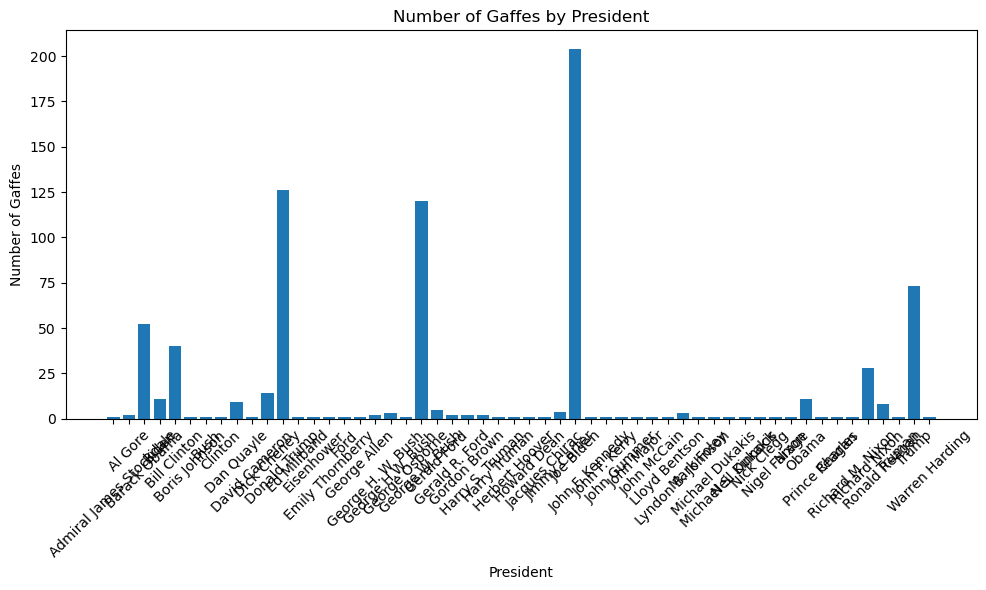

In [7]:
import matplotlib.pyplot as plt

gaffes_by_president = df.groupby("President").size()

plt.figure(figsize=(10, 6))

bar_width = 0.8  # Adjust the bar width as needed

plt.bar(gaffes_by_president.index, gaffes_by_president.values, width=bar_width)
plt.xlabel("President")
plt.ylabel("Number of Gaffes")
plt.title("Number of Gaffes by President")
plt.xticks(rotation=45)
plt.xticks(range(len(gaffes_by_president.index)), gaffes_by_president.index)  # Set custom x-axis ticks
plt.tight_layout()
plt.show()


In [8]:
date = df['Date'].unique()
print(date)

['26-May-23' '18-Apr-16' '04-Aug-19' 'Apr-19' 'Apr-20' 'March, 2020'
 '2015' '2010' '2008' '2007' '1988' nan 'Dec-19' '19-Mar-09' '03-Mar-09'
 '07-Nov-08' '11-Oct-08' '07-Sep-08' '20-Jun-08' '06-Apr-08' '16-Feb-08'
 '05-Jan-08' '19-Mar-07' '23-Mar-10' '30-Apr-09' 'Feb. 6, 2009'
 'Jan. 21, 2009' 'Oct. 20, 2008' 'Sept. 10, 2008' 'Sept. 9, 2008'
 'Jan. 31, 2007' '17-Jun-06' 'Aug. 23, 1987' '29-Sep-22' '1976' '1984'
 '1998' '2021' '2020' '1950' '1974' '1975' '1987' '2006' '2009' '2016'
 '2019' '2022' 'Nov-16' '24-Feb-20' '02-Mar-20' '22-May-20' '22-Oct-20'
 '24-Oct-20' '08-Mar-21' '04-May-21' '04-Jun-21' '15-Sep-21' '20-Dec-21'
 '24-Dec-21' '11-Jan-22' '01-Mar-22' '08-Apr-22' '20-Jul-22'
 'Unknown date' '30-Oct-22' '14-Dec-22' '12-Apr-23' '16-May-23'
 '28-Jun-23' '-' '09-Aug-64' '06-Oct-76' '01-Dec-82' 'Jan-92' '04-Sep-00'
 '20-Jan-09' '27-Jan-09' '24-Feb-09' 'Mar-09' '28-Sep-22' '16-Jul-22'
 '13-Jul-22' '11-Jul-22' '02-May-22' '31-Mar-22' '26-Mar-22' '02-Mar-22'
 '24-Jan-22' '30-Nov-21' '

In [9]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter out invalid dates
df = df[df['Date'].notnull()]

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Display unique years
unique_years = df['Year'].unique()
print(unique_years)


[2023 2016 2019 2020 2015 2010 2008 2007 1988 2009 2006 1987 2022 1976
 1984 1998 2021 1950 1974 1975 2064 1982 1992 2000 2002 2004 2001 2063
 1973 2029 1994 1995 1993 2012 1977 1978 1970 1971 2005 2003 1989 2014
 2013 2011 1990 1983]


/tmp/ipykernel_20/1251490004.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year


/tmp/ipykernel_20/2205103524.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/tmp/ipykernel_20/2205103524.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Date'], inplace=True)
/tmp/ipykernel_20/2205103524.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

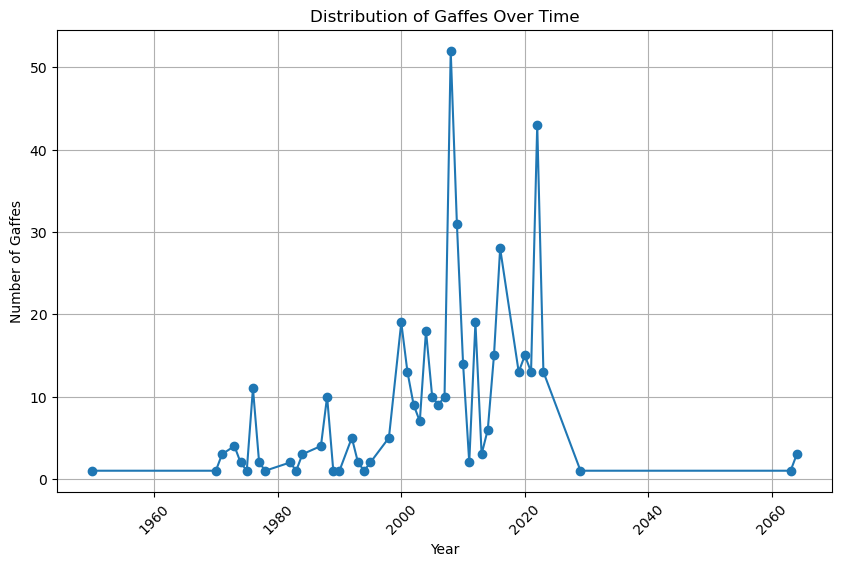

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing or invalid dates
df.dropna(subset=['Date'], inplace=True)

# Extract the year from the Date column
df['Year'] = df['Date'].dt.year

# Group the gaffes by year
gaffes_by_year = df['Year'].value_counts().sort_index()

# Plot the distribution of gaffes over time
plt.figure(figsize=(10, 6))
plt.plot(gaffes_by_year.index, gaffes_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Gaffes')
plt.title('Distribution of Gaffes Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/tmp/ipykernel_20/2679616953.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/tmp/ipykernel_20/2679616953.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Date'], inplace=True)
/tmp/ipykernel_20/2679616953.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

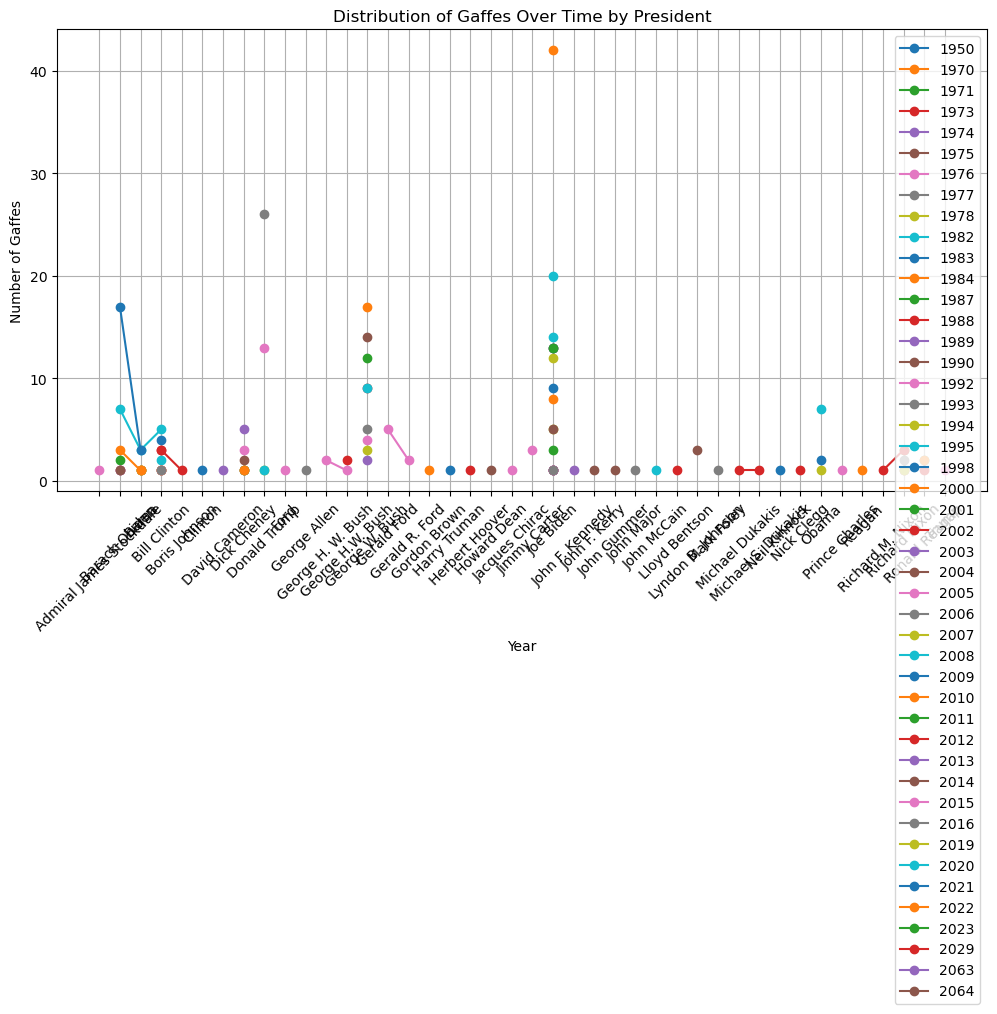

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing or invalid dates
df.dropna(subset=['Date'], inplace=True)

# Extract the year from the Date column
df['Year'] = df['Date'].dt.year

# Group the gaffes by President and Year
gaffes_by_president_year = df.groupby(['President', 'Year']).size().unstack()

# Plot the distribution of gaffes over time for each president
plt.figure(figsize=(12, 6))

for president in gaffes_by_president_year.columns:
    plt.plot(gaffes_by_president_year.index, gaffes_by_president_year[president], marker='o', label=president)

plt.xlabel('Year')
plt.ylabel('Number of Gaffes')
plt.title('Distribution of Gaffes Over Time by President')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Joe Biden                  164
George W. Bush              75
Donald Trump                41
Barack Obama                33
Bill Clinton                23
Dick Cheney                 14
Richard Nixon               11
Biden                       11
Obama                       10
Gerald Ford                  6
Ronald Reagan                5
Lyndon B. Johnson            3
George H.W. Bush             3
Jimmy Carter                 3
Gerald R. Ford               2
George H. W. Bush            2
Michael Dukakis              2
Howard Dean                  2
John F. Kerry                1
Trump                        1
Prince Charles               1
John Major                   1
Jacques Chirac               1
Neil Kinnock                 1
Nick Clegg                   1
Admiral James Stockdale      1
Gordon Brown                 1
Lloyd Bentson                1
Michael S. Dukakis           1
David Cameron                1
John Gummer                  1
George Allen                 1
John F. 

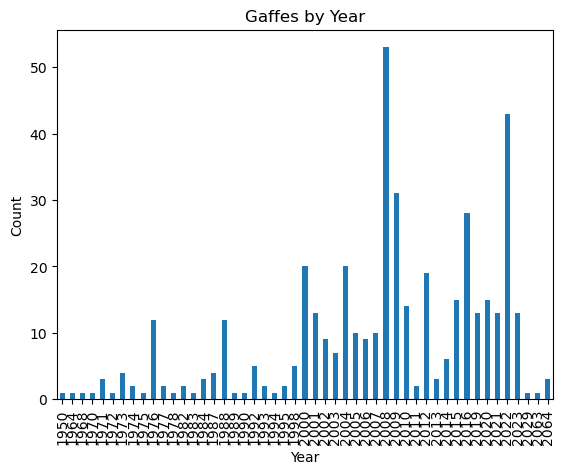

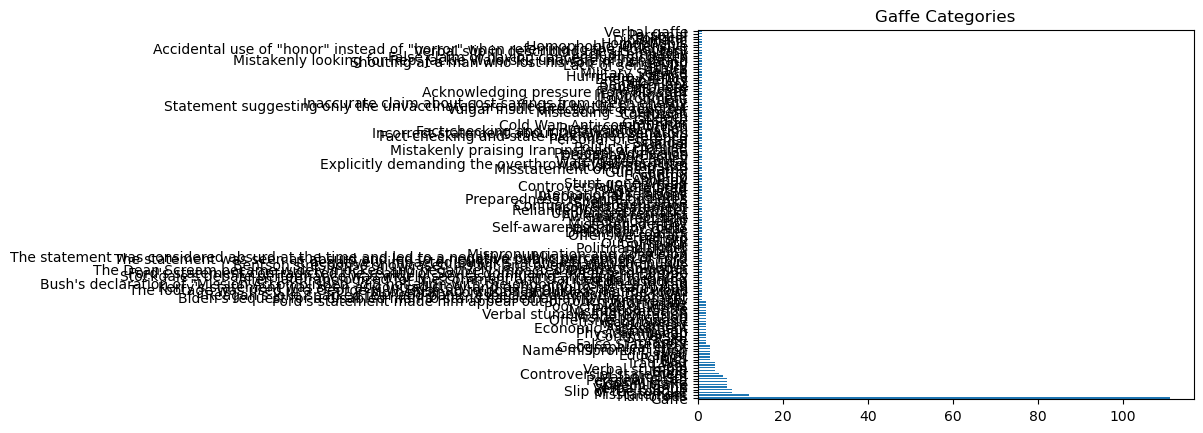

In [12]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
df = pd.read_csv('/kaggle/input/presidential-gaffes/presidential gaffes.csv', encoding='latin-1')

# Preprocess the Date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df[df['Date'].notnull()]
df['Year'] = df['Date'].dt.year

# Exploratory Data Analysis (EDA)
president_gaffe_counts = df['President'].value_counts()
print(president_gaffe_counts)

gaffe_by_year = df['Year'].value_counts().sort_index()
gaffe_by_year.plot(kind='bar', xlabel='Year', ylabel='Count', title='Gaffes by Year')
plt.show()

category_counts = df['Category'].value_counts()
category_counts.plot(kind='barh', title='Gaffe Categories')
plt.show()



count    768.000000
mean       0.075627
std        0.449546
min       -0.959500
25%       -0.083575
50%        0.000000
75%        0.440400
max        0.962600
Name: Sentiment, dtype: float64
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


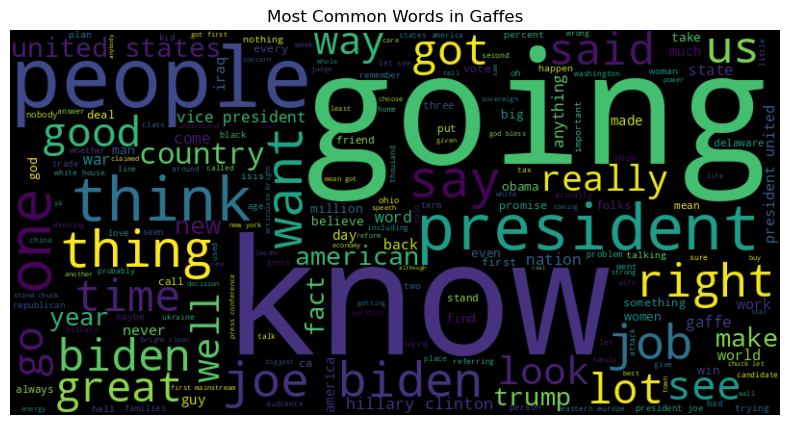

Topic #1:
going, people, president, know, said

Topic #2:
president, going, man, think, states

Topic #3:
people, going, hillary, know, clinton

Topic #4:
know, president, biden, states, jobs

Topic #5:
biden, joe, think, like, president



In [13]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the dataset
df = pd.read_csv('/kaggle/input/presidential-gaffes/presidential gaffes.csv', encoding='latin-1')

# Sentiment Analysis
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if isinstance(text, str):
        return sia.polarity_scores(text)['compound']
    else:
        return 0.0

df['Sentiment'] = df['Quote or Statement'].apply(get_sentiment)
print(df['Sentiment'].describe())

# Text Preprocessing
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
        return ' '.join(tokens)
    else:
        return ''

df['Cleaned_Text'] = df['Quote or Statement'].apply(preprocess_text)

# Word Cloud
text = ' '.join(df['Cleaned_Text'])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Gaffes')
plt.show()

# Topic Modeling
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['Cleaned_Text'])

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic #{topic_idx + 1}:")
    top_words_idx = topic.argsort()[:-6:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(', '.join(top_words))
    print()


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

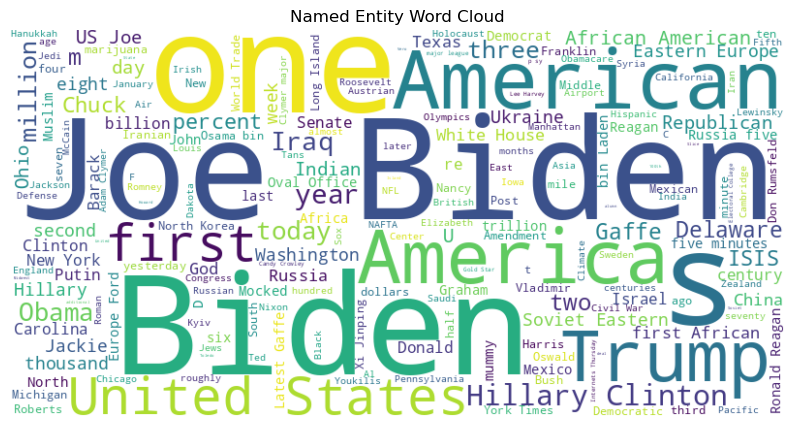

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import spacy

# Load the English language model for spaCy
nlp = spacy.load('en_core_web_sm')

# Define the text column
text_column = 'Quote or Statement'

# Load the dataset
df = pd.read_csv('/kaggle/input/presidential-gaffes/presidential gaffes.csv', encoding='latin-1')

# Drop rows with missing values in the text column
df = df.dropna(subset=[text_column])

# Perform Named Entity Recognition (NER)
def perform_ner(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return entities

# Apply NER to each row
df['Entities'] = df[text_column].apply(perform_ner)

# Concatenate all entities into a single string, excluding NaN values
all_entities = ' '.join([entity for entity_list in df['Entities'].values for entity in entity_list if pd.notnull(entity)])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_entities)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Named Entity Word Cloud')
plt.show()


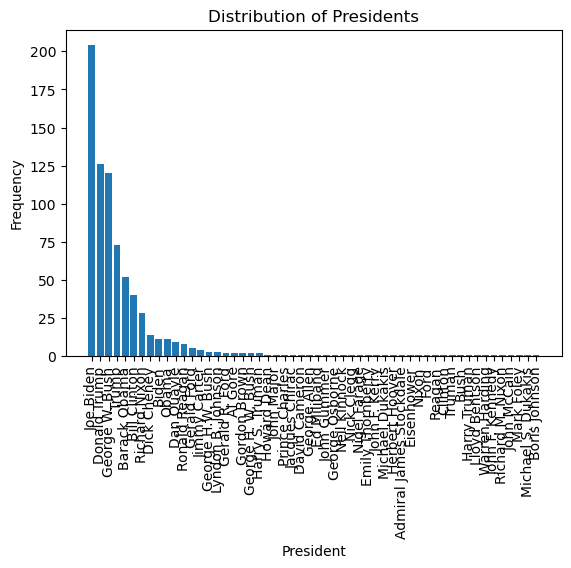

In [15]:
import matplotlib.pyplot as plt

# Calculate the frequency of each president
president_freq = df['President'].value_counts()

# Visualize the distribution of presidents
plt.bar(president_freq.index, president_freq.values)
plt.xlabel('President')
plt.ylabel('Frequency')
plt.title('Distribution of Presidents')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Adjust the padding between x-axis labels
plt.subplots_adjust(bottom=0.2)

plt.show()


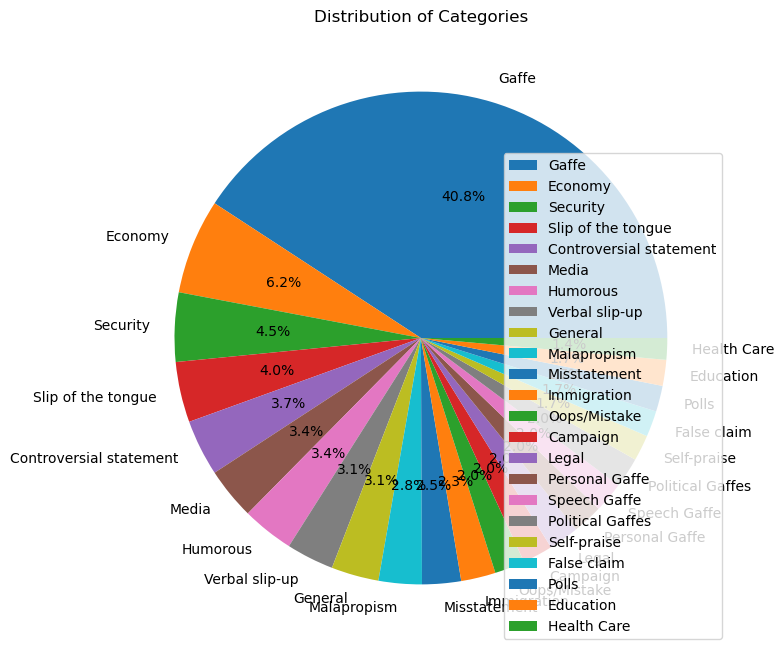

In [16]:
import matplotlib.pyplot as plt

# Calculate the frequency of each category
category_freq = df['Category'].value_counts()

# Set the threshold for category frequency
threshold = 5

# Filter the category frequency based on the threshold
relevant_categories = category_freq[category_freq >= threshold]

# Set the figure size
plt.figure(figsize=(8, 8))

# Visualize the distribution of relevant categories
plt.pie(relevant_categories.values, labels=relevant_categories.index, autopct='%1.1f%%')

# Set the title
plt.title('Distribution of Categories')

# Add legend in the bottom right corner
plt.legend(loc='lower right')

plt.show()


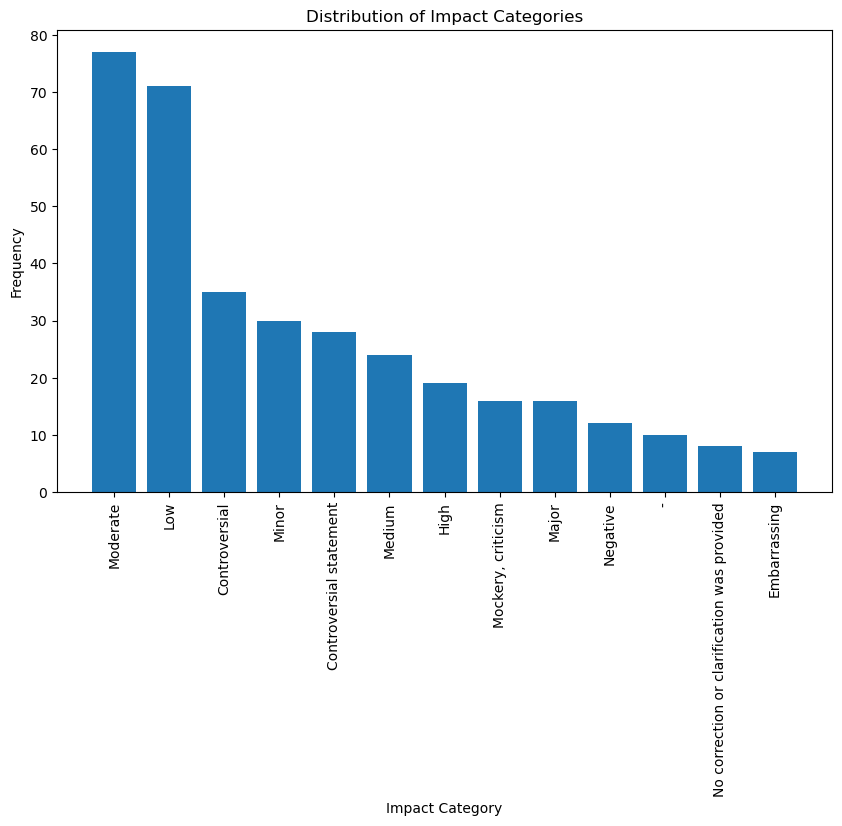

In [17]:
import matplotlib.pyplot as plt
# Calculate the frequency of each impact category

impact_freq = df['Impact'].value_counts()
# Set the threshold for impact category frequency

threshold = 5
# Filter the impact frequency based on the threshold

relevant_impacts = impact_freq[impact_freq >= threshold]
# Set the figure size

plt.figure(figsize=(10, 6))
# Visualize the distribution of relevant impact categories

plt.bar(relevant_impacts.index, relevant_impacts.values)
plt.xlabel('Impact Category')
plt.ylabel('Frequency')
plt.title('Distribution of Impact Categories')
# Rotate x-axis labels by 90 degrees

plt.xticks(rotation=90)

plt.show()

In [18]:
pip install tldextract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


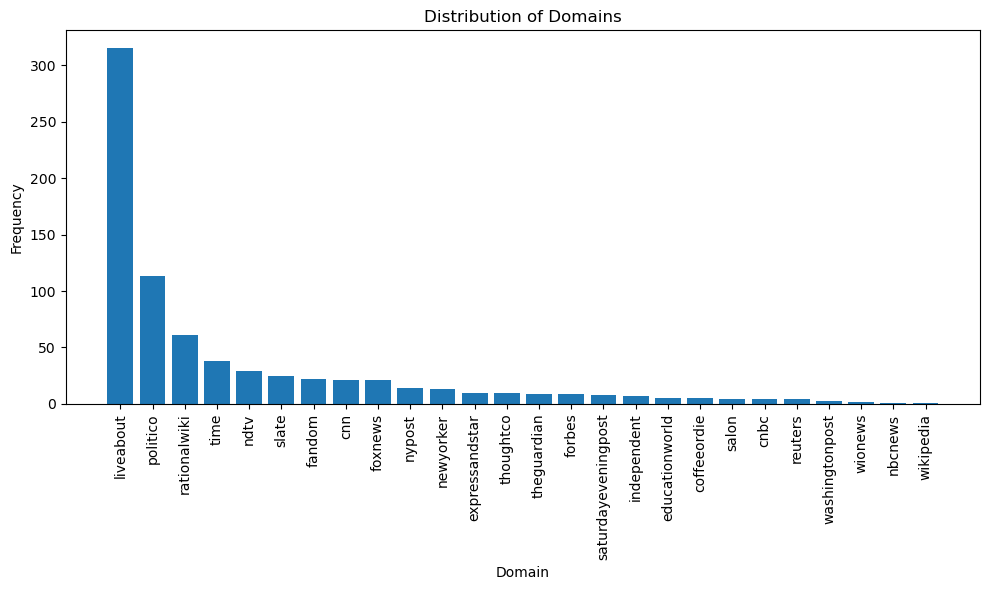

In [19]:
import matplotlib.pyplot as plt
import tldextract

# Extract the domain information from the URLs
df['Domain'] = df['URL'].apply(lambda url: tldextract.extract(url).domain)

# Calculate the frequency of each domain
domain_freq = df['Domain'].value_counts()

# Visualize the distribution of domains
plt.figure(figsize=(10, 6))
plt.bar(domain_freq.index, domain_freq.values)
plt.xlabel('Domain')
plt.ylabel('Frequency')
plt.title('Distribution of Domains')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


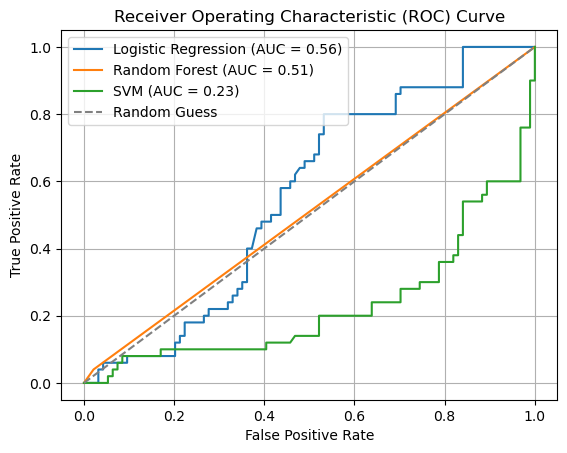

Gaffe Prediction Results:
Gaffe: Biden incorrectly stated he has four granddaughters.
Logistic Regression: Joe Biden
Random Forest: Joe Biden
SVM: Joe Biden

Gaffe: Trump confused 9/11 with the convenience store.
Logistic Regression: Donald Trump
Random Forest: Donald Trump
SVM: Donald Trump

Gaffe: Trump confused Dayton and Toledo after a mass shooting.
Logistic Regression: Donald Trump
Random Forest: Donald Trump
SVM: Joe Biden

Gaffe: Trump demands investigation of the 'oranges' of the Russia investigation.
Logistic Regression: Joe Biden
Random Forest: Donald Trump
SVM: Joe Biden



In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# Step 1: Data Preprocessing
df.dropna(subset=['Context', 'President'], inplace=True)
X = df['Context']
y = df['President']

# Step 2: Feature Engineering
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Step 3: Model Selection and Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
svm = SVC(probability=True)

logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Step 4: Model Evaluation
logistic_regression_probs = logistic_regression.predict_proba(X_test)
random_forest_probs = random_forest.predict_proba(X_test)
svm_probs = svm.predict_proba(X_test)

logistic_regression_fpr, logistic_regression_tpr, _ = roc_curve(y_test, logistic_regression_probs[:, 1], pos_label='Joe Biden')
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_probs[:, 1], pos_label='Joe Biden')
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs[:, 1], pos_label='Joe Biden')

logistic_regression_auc = auc(logistic_regression_fpr, logistic_regression_tpr)
random_forest_auc = auc(random_forest_fpr, random_forest_tpr)
svm_auc = auc(svm_fpr, svm_tpr)

# Plot AUC-ROC curves
plt.plot(logistic_regression_fpr, logistic_regression_tpr, label=f'Logistic Regression (AUC = {logistic_regression_auc:.2f})')
plt.plot(random_forest_fpr, random_forest_tpr, label=f'Random Forest (AUC = {random_forest_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Gaffe Prediction
gaffes = [
    "Biden incorrectly stated he has four granddaughters.",
    "Trump confused 9/11 with the convenience store.",
    "Trump confused Dayton and Toledo after a mass shooting.",
    "Trump demands investigation of the 'oranges' of the Russia investigation."
]

gaffe_vectors = vectorizer.transform(gaffes)

logistic_regression_preds = logistic_regression.predict(gaffe_vectors)
random_forest_preds = random_forest.predict(gaffe_vectors)
svm_preds = svm.predict(gaffe_vectors)

print("Gaffe Prediction Results:")
for gaffe, logistic_regression_pred, random_forest_pred, svm_pred in zip(gaffes, logistic_regression_preds, random_forest_preds, svm_preds):
    print("Gaffe:", gaffe)
    print("Logistic Regression:", logistic_regression_pred)
    print("Random Forest:", random_forest_pred)
    print("SVM:", svm_pred)
    print()


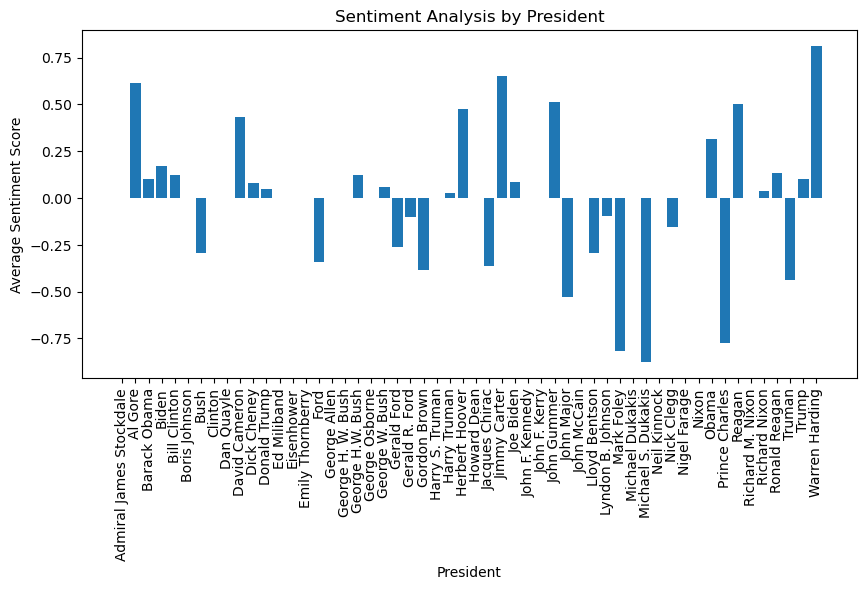

Overall sentiment study: -0.00607339595740407


In [21]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Preprocess the text data (replace with your own preprocessing steps)
# Initialize the sentiment analyzer

sia = SentimentIntensityAnalyzer()
# Perform sentiment analysis and assign sentiments to each statement

df['Sentiment'] = df['Quote or Statement'].apply(lambda x: sia.polarity_scores(x)['compound'])
# Group statements by person

grouped_df = df.groupby('President')['Sentiment'].mean().reset_index()
# Visualize sentiment study


plt.figure(figsize=(10, 6))
plt.bar(grouped_df['President'], grouped_df['Sentiment'])
plt.xlabel('President')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Analysis by President')
# Rotate x-axis labels by 90 degrees and adjust spacing

plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3)

plt.show()
#Overall sentiment study

overall_sentiment = grouped_df['Sentiment'].mean()
print(f"Overall sentiment study: {overall_sentiment}")

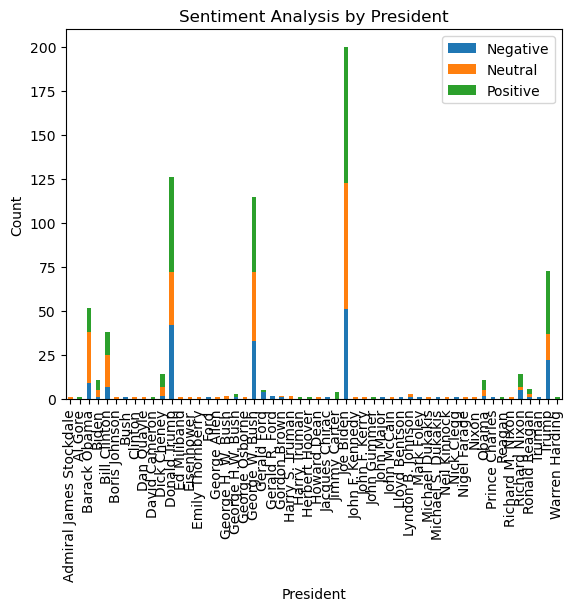

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis and assign sentiment labels to each statement
df['Sentiment'] = df['Quote or Statement'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Function to label sentiments
def label_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Label sentiments for each president
df['Sentiment Label'] = df['Sentiment'].apply(label_sentiment)

# Group statements by president and sentiment label
grouped_df = df.groupby(['President', 'Sentiment Label']).size().unstack(fill_value=0)

# Plot the stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('President')
plt.ylabel('Count')
plt.title('Sentiment Analysis by President')

# Add a legend
plt.legend()

# Show the plot
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


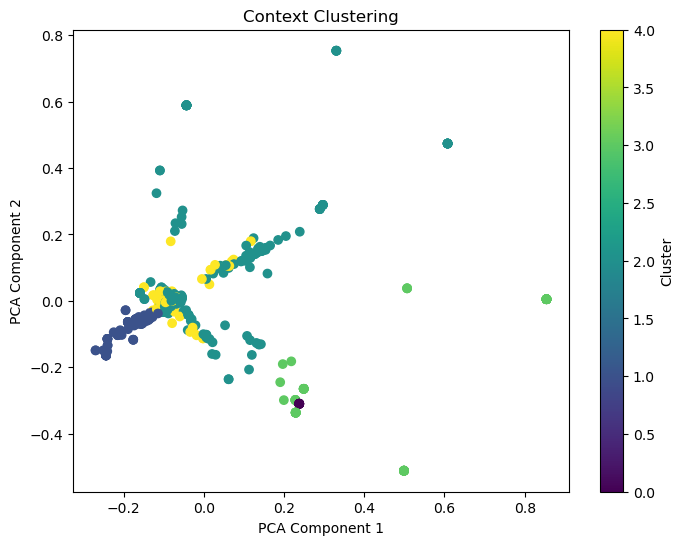

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Drop rows with null values in the "Context" column
df.dropna(subset=["Context"], inplace=True)

# Replace NaN values in "Context" column with an empty string
df["Context"].fillna("", inplace=True)

# Vectorize the context data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["Context"])

# Apply K-means clustering
k = 5  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Apply dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap="viridis")
plt.title("Context Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster")
plt.show()


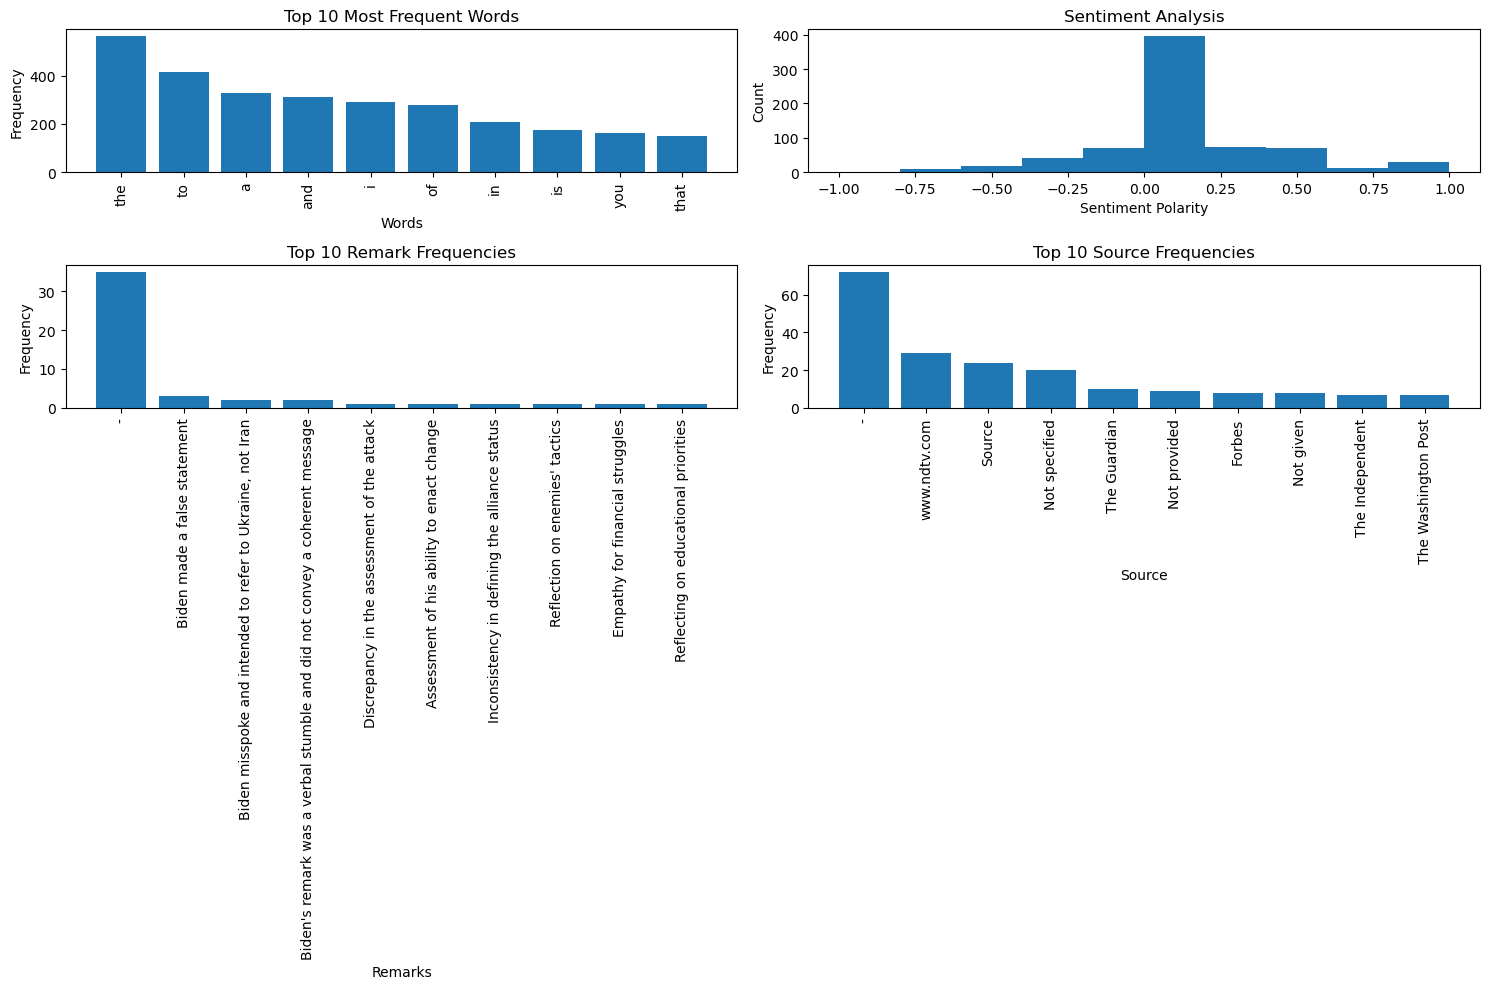

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob


# Word Frequency Analysis
word_counts = df['Quote or Statement'].str.lower().str.split().explode().value_counts()

# Sentiment Analysis
df['Sentiment'] = df['Quote or Statement'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Impact Analysis
impact_counts = df['Impact'].value_counts()

# Remark Analysis
remark_counts = df['Remarks'].value_counts()

# Source Analysis
source_counts = df['Source'].value_counts()

# Category Analysis
category_counts = df['Category'].value_counts()

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Word Frequency Analysis
axes[0, 0].bar(word_counts.index[:10], word_counts.values[:10])
axes[0, 0].set_title('Top 10 Most Frequent Words')
axes[0, 0].set_xlabel('Words')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees

# Sentiment Analysis
axes[0, 1].hist(df['Sentiment'], bins=10)
axes[0, 1].set_title('Sentiment Analysis')
axes[0, 1].set_xlabel('Sentiment Polarity')
axes[0, 1].set_ylabel('Count')

# Remark Analysis
axes[1, 0].bar(remark_counts.index[:10], remark_counts.values[:10])
axes[1, 0].set_title('Top 10 Remark Frequencies')
axes[1, 0].set_xlabel('Remarks')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees

# Source Analysis
axes[1, 1].bar(source_counts.index[:10], source_counts.values[:10])
axes[1, 1].set_title('Top 10 Source Frequencies')
axes[1, 1].set_xlabel('Source')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees


plt.tight_layout()
plt.show()


In [25]:
unique_urls = df['URL'].unique()
for url in unique_urls:
    print(url)


https://www.forbes.com/sites/brianbushard/2023/05/26/biden-incorrectly-says-he-has-4-granddaughters-he-has-5-in-latest-gaffe/
https://www.salon.com/2020/06/26/10-of-trumps-most-embarrassing-gaffes_partner/
https://www.theguardian.com/us-news/2019/apr/25/joe-biden-2020-public-gaffes-mistakes-history
https://www.wionews.com/photos/witness-us-president-joe-bidens-most-memorable-gaffes-447380/#in-speech-gaffe-biden-says-iranian-people-instead-of-ukrainian-458090
https://content.time.com/time/specials/packages/completelist/0,29569,1887005,00.html
https://content.time.com/time/specials/packages/completelist/0,29569,1895156,00.html
https://edition.cnn.com/2022/09/28/politics/joe-biden-jackie-walorski-comment-analysis/index.html
https://www.saturdayeveningpost.com/2017/02/8-embarrassing-presidential-gaffes/
https://coffeeordie.com/presidential-gaffes
https://rationalwiki.org/wiki/Fun:List_of_Joe_Biden_gaffes#2023
https://annex.fandom.com/wiki/List_of_U.S._presidential_faux-pas,_gaffes,_and_unf

**Also read about the analysis on Medium :**[click here!!!](https://medium.com/@anoopjohny2000/unveiling-the-quirky-side-of-leadership-analyzing-presidential-gaffes-with-python-ce60c8ba99f5)